<a href="https://colab.research.google.com/github/AlHasSaN0ALi/Alhassan__DSAI_305_IE._Phase_Mid_progress_Report/blob/main/Alhassan_202200681_Project_DSAI_305_IE__Phase_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

print("Missing values:\n", df.isnull().sum())

Missing values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


<ipython-input-4-6021b2b31b2b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


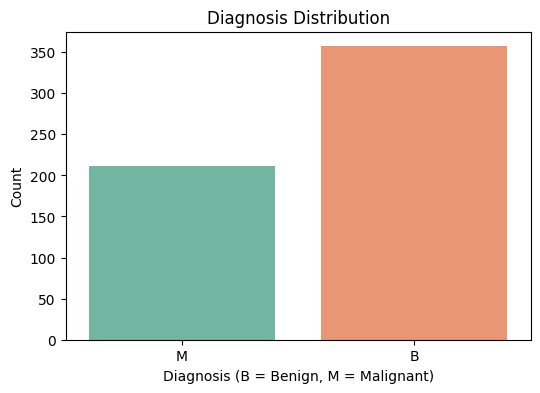

diagnosis
B    357
M    212
Name: count, dtype: int64


In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis (B = Benign, M = Malignant)')
plt.ylabel('Count')
plt.show()

print(df['diagnosis'].value_counts())

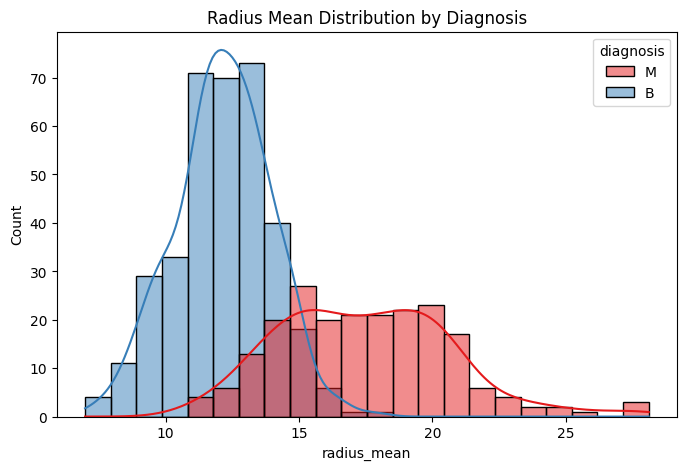

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True, palette='Set1')
plt.title('Radius Mean Distribution by Diagnosis')
plt.show()

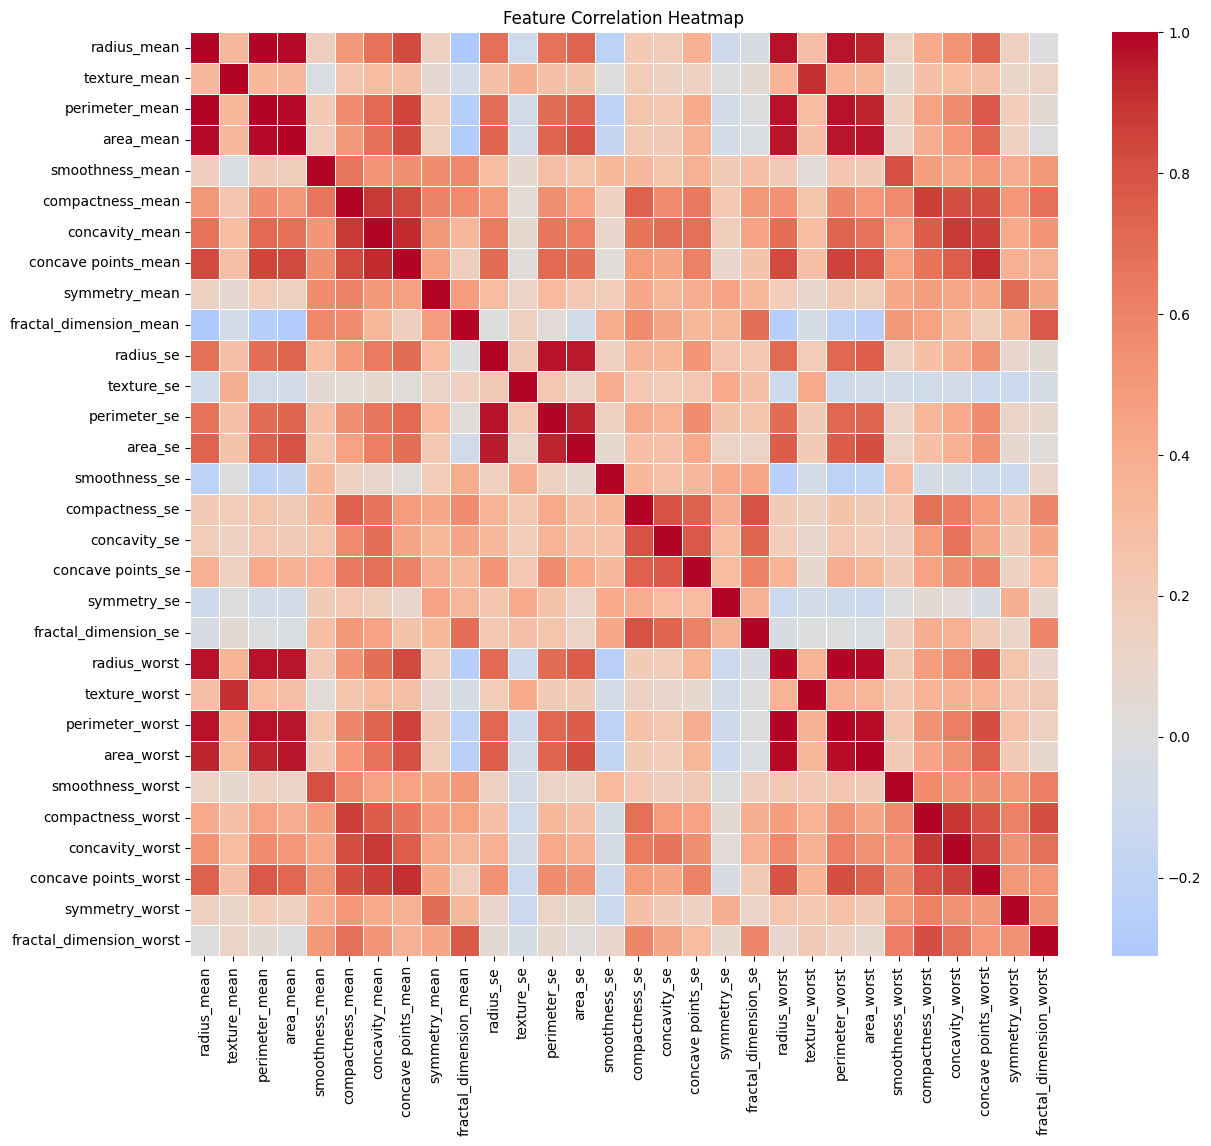

In [6]:
corr = df.drop(columns='diagnosis').corr()


plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

<ipython-input-7-7b78aa919d33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')
<ipython-input-7-7b78aa919d33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')
<ipython-input-7-7b78aa919d33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')
<ipython-input-7-7b78aa919d33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` 

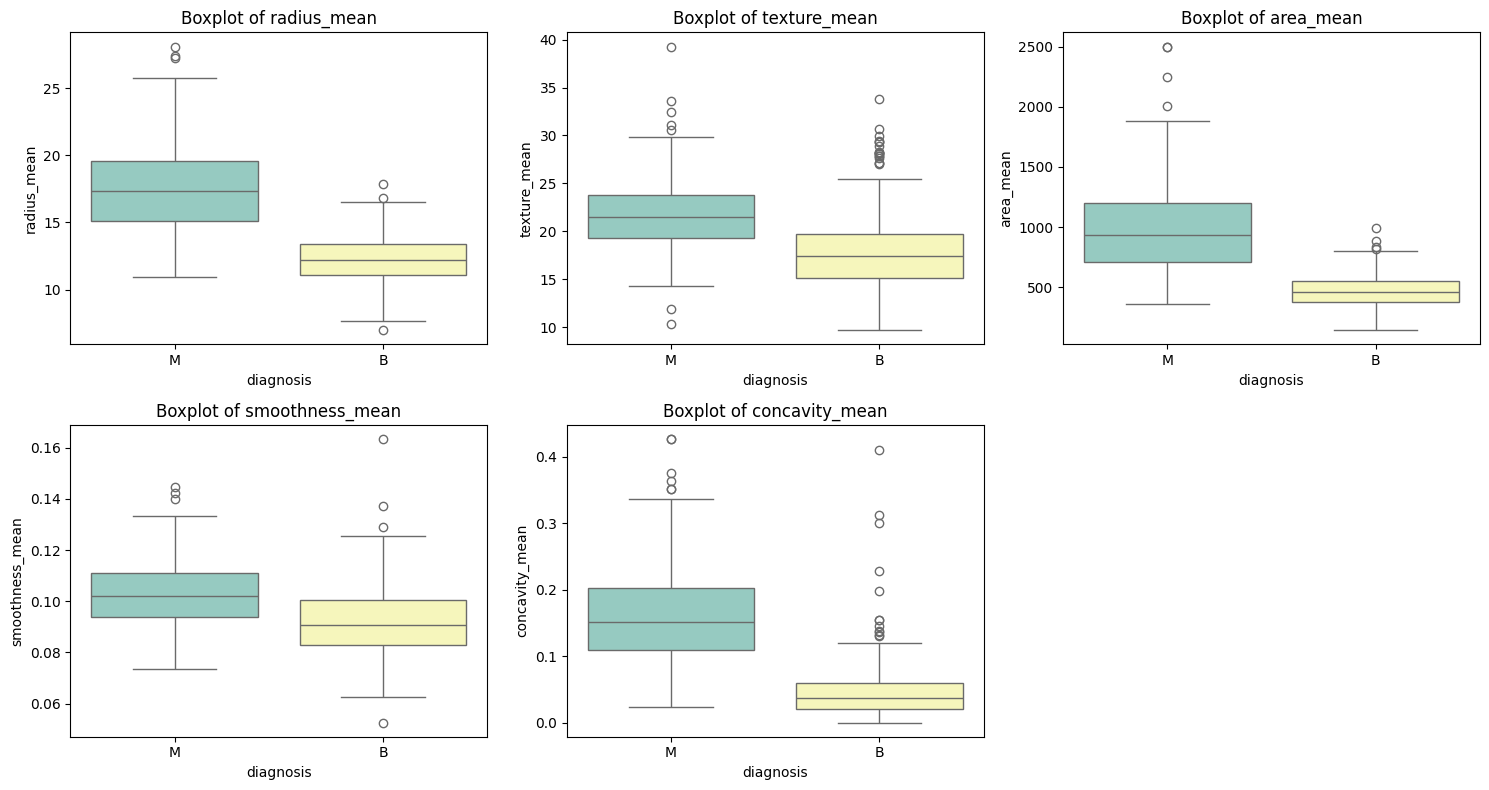

In [7]:
features_to_plot = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


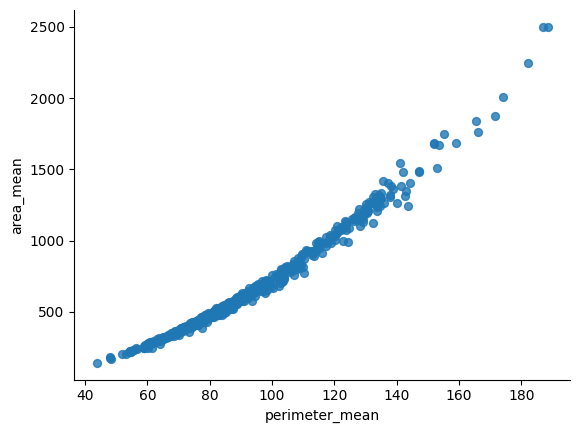

In [8]:
df.plot(kind='scatter', x='perimeter_mean', y='area_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

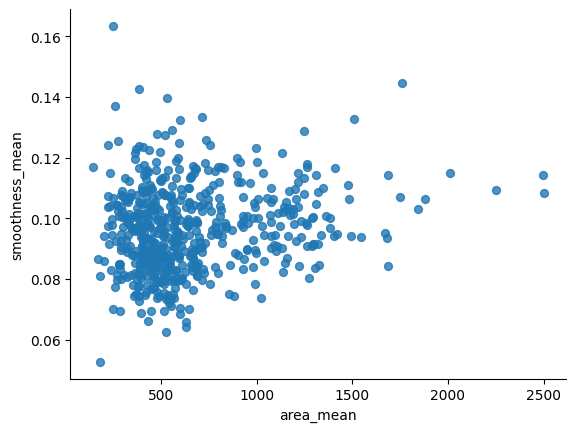

In [9]:
df.plot(kind='scatter', x='area_mean', y='smoothness_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

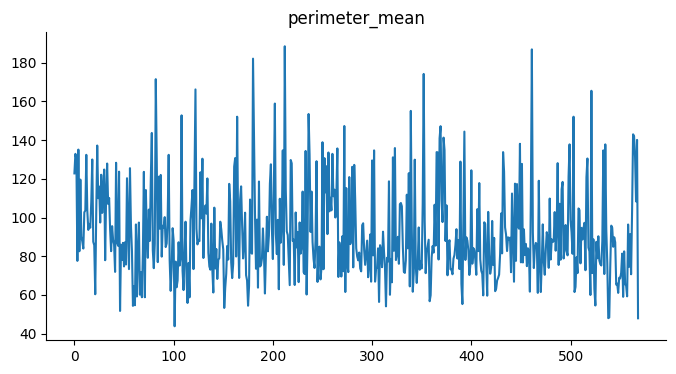

In [10]:
df['perimeter_mean'].plot(kind='line', figsize=(8, 4), title='perimeter_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-11-6e32c64a8899>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set2')
<ipython-input-11-6e32c64a8899>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set2')
<ipython-input-11-6e32c64a8899>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set2')
<ipython-input-11-6e32c64a8899>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

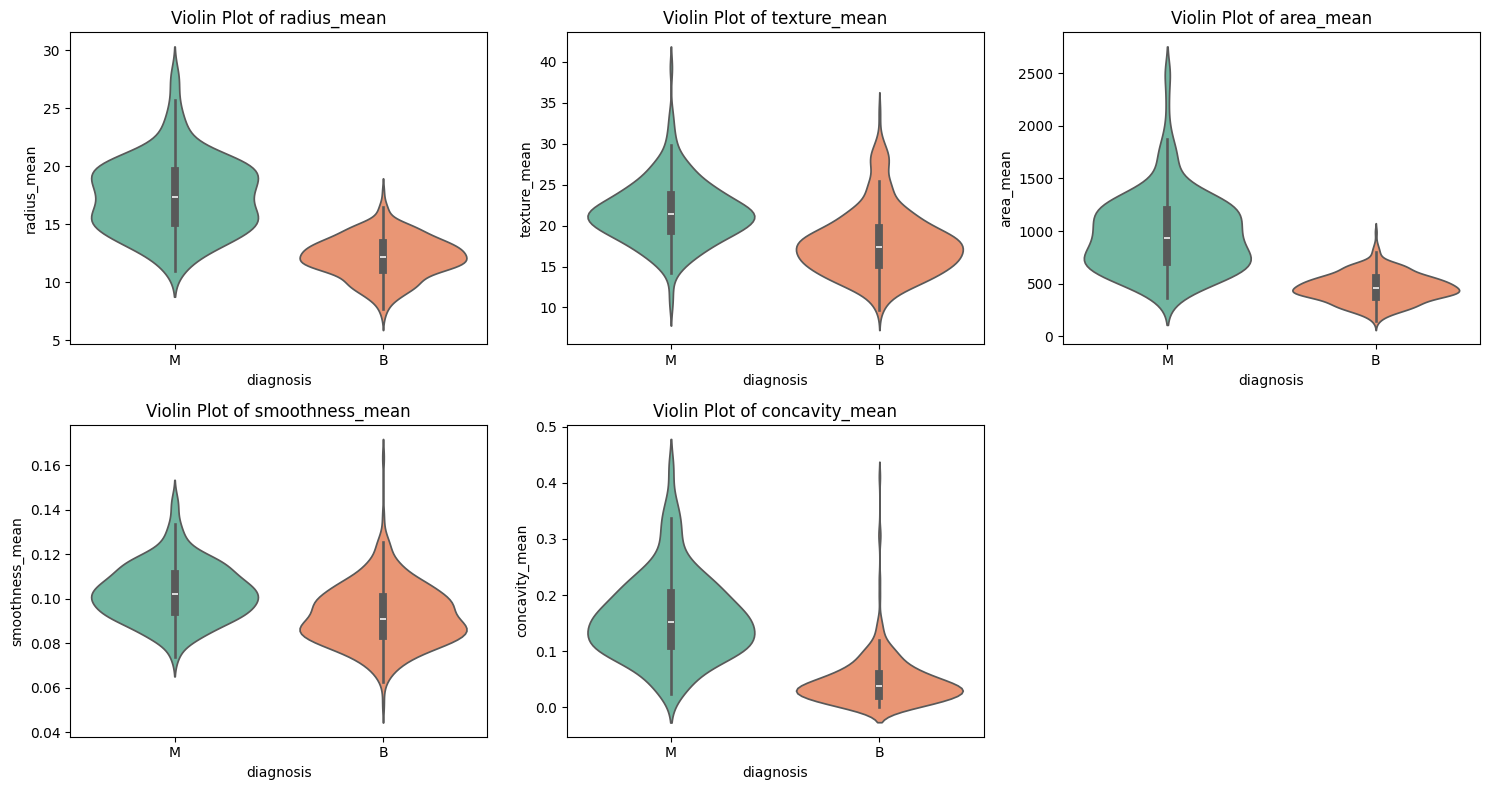

In [11]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set2')
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()

In [12]:
df['diagnosis']

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [13]:
l = LabelEncoder()
df['diagnosis'] = l.fit_transform(df['diagnosis'])

In [14]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Random Forest (Before Outlier Removal)**

In [15]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [16]:
print("Random Forest (Before Outlier Removal):")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest (Before Outlier Removal):
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



**Logistic Regression (Before Outlier Removal)**

In [17]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [18]:
print("Logistic Regression (Before Outlier Removal):")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression (Before Outlier Removal):
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [19]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

In [20]:
print("SVM (Before Outlier Removal):")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM (Before Outlier Removal):
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



XGBoost (Before Outlier Removal)

In [21]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:40:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [22]:
print("XGBoost (Before Outlier Removal):")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost (Before Outlier Removal):
[[69  2]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [23]:
df.shape

(569, 31)

In [24]:
df_iqr = df.copy()

def remove_outliers_iqr(df, features):
    outlier_indices = []

    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
        outlier_indices.extend(outliers)

    outlier_indices = list(set(outlier_indices))
    df_cleaned = df.drop(index=outlier_indices)

    return df_cleaned

numerical_features = df_iqr.drop(columns='diagnosis').columns
df_iqr_cleaned = remove_outliers_iqr(df_iqr, numerical_features)


In [25]:
print(f"Original shape: {df.shape}")
print(f"After outlier removal: {df_iqr_cleaned.shape}")

Original shape: (569, 31)
After outlier removal: (398, 31)


In [26]:
df_iqr_cleaned

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,1,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,0,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
555,0,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
558,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


In [27]:
df_cleaned_encoded = df_iqr_cleaned.copy()
le = LabelEncoder()
df_cleaned_encoded['diagnosis'] = le.fit_transform(df_cleaned_encoded['diagnosis'])


In [28]:
X_clean = df_cleaned_encoded.drop(columns='diagnosis')
y_clean = df_cleaned_encoded['diagnosis']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clean, y_clean, test_size=0.4, random_state=42)

scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model_c = RandomForestClassifier(random_state=42)
rf_model_c.fit(X_train_c_scaled, y_train_c)
y_pred_rf_c = rf_model_c.predict(X_test_c_scaled)

print("Random Forest (After Outlier Removal):")
print(confusion_matrix(y_test_c, y_pred_rf_c))
print(classification_report(y_test_c, y_pred_rf_c))

Random Forest (After Outlier Removal):
[[113   3]
 [ 11  33]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       116
           1       0.92      0.75      0.82        44

    accuracy                           0.91       160
   macro avg       0.91      0.86      0.88       160
weighted avg       0.91      0.91      0.91       160



In [30]:
from sklearn.linear_model import LogisticRegression

lr_model_c = LogisticRegression(max_iter=1000)
lr_model_c.fit(X_train_c_scaled, y_train_c)
y_pred_lr_c = lr_model_c.predict(X_test_c_scaled)

print("Logistic Regression (After Outlier Removal):")
print(confusion_matrix(y_test_c, y_pred_lr_c))
print(classification_report(y_test_c, y_pred_lr_c))

Logistic Regression (After Outlier Removal):
[[113   3]
 [  5  39]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       116
           1       0.93      0.89      0.91        44

    accuracy                           0.95       160
   macro avg       0.94      0.93      0.94       160
weighted avg       0.95      0.95      0.95       160



In [31]:
from sklearn.svm import SVC

svm_model_c = SVC()
svm_model_c.fit(X_train_c_scaled, y_train_c)
y_pred_svm_c = svm_model_c.predict(X_test_c_scaled)

print("SVM (After Outlier Removal):")
print(confusion_matrix(y_test_c, y_pred_svm_c))
print(classification_report(y_test_c, y_pred_svm_c))


SVM (After Outlier Removal):
[[114   2]
 [  4  40]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       116
           1       0.95      0.91      0.93        44

    accuracy                           0.96       160
   macro avg       0.96      0.95      0.95       160
weighted avg       0.96      0.96      0.96       160



In [32]:
import xgboost as xgb

xgb_model_c = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_c.fit(X_train_c_scaled, y_train_c)
y_pred_xgb_c = xgb_model_c.predict(X_test_c_scaled)

print("XGBoost (After Outlier Removal):")
print(confusion_matrix(y_test_c, y_pred_xgb_c))
print(classification_report(y_test_c, y_pred_xgb_c))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:40:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost (After Outlier Removal):
[[112   4]
 [ 11  33]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       116
           1       0.89      0.75      0.81        44

    accuracy                           0.91       160
   macro avg       0.90      0.86      0.88       160
weighted avg       0.91      0.91      0.90       160



**SHAP**

In [33]:
!pip install shap
import shap

In [34]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_scaled)

In [35]:
# shap_values = explainer.shap_values(X_train_scaled)
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# print("SHAP shape:", shap_values[1].shape)
# print("Train set shape:", X_train_scaled_df.shape)

# shap.summary_plot(shap_values[1], X_train_scaled_df, plot_type="bar")


In [36]:
from sklearn.inspection import PartialDependenceDisplay

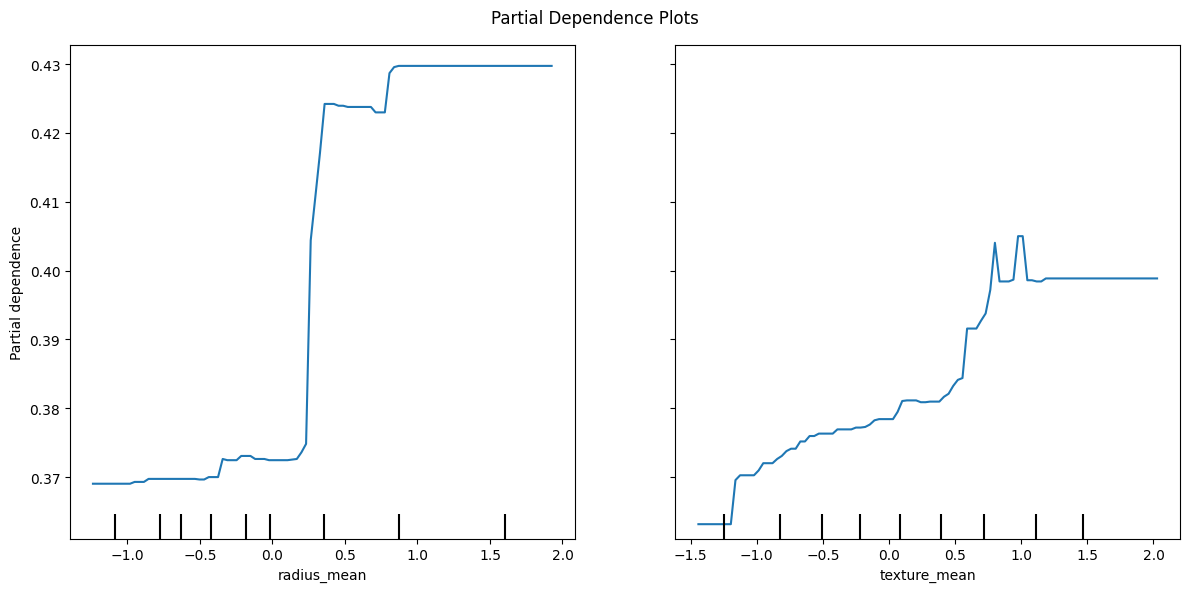

In [37]:
features_to_plot = ['radius_mean', 'texture_mean']

fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(
    rf_model,
    X_test_scaled,
    features=features_to_plot,
    feature_names=X.columns,
    ax=ax
)
plt.suptitle('Partial Dependence Plots')
plt.tight_layout()
plt.show()


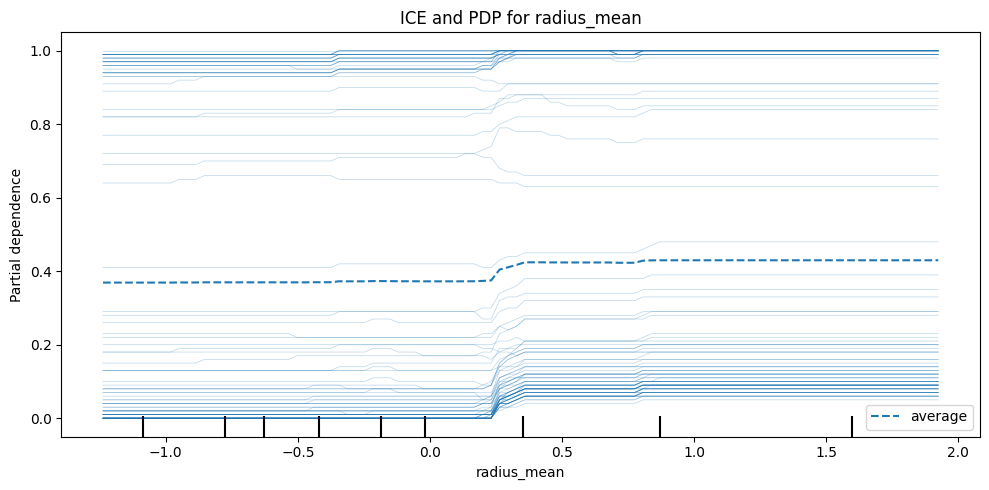

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
PartialDependenceDisplay.from_estimator(
    rf_model,
    X_test_scaled,
    features=['radius_mean'],
    feature_names=X.columns,
    kind="both",
    ax=ax
)
plt.title("ICE and PDP for radius_mean")
plt.tight_layout()
plt.show()


In [39]:
!pip install alibi

In [40]:
!pip uninstall -y thinc spacy alibi

Found existing installation: thinc 8.1.10
Uninstalling thinc-8.1.10:
  Successfully uninstalled thinc-8.1.10
Found existing installation: spacy 3.5.3
Uninstalling spacy-3.5.3:
  Successfully uninstalled spacy-3.5.3
Found existing installation: alibi 0.9.4
Uninstalling alibi-0.9.4:
  Successfully uninstalled alibi-0.9.4


In [41]:
!pip install --upgrade numpy

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires spacy<4, which is not installed.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
albumentations 2.0.5 requires pydantic>=2.9.2, but you have pydantic 1.10.21 which is incompatible.


In [42]:
!pip install "thinc==8.1.10" "spacy==3.5.3" "alibi==0.9.4"

  Using cached thinc-8.1.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
  Using cached spacy-3.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (25 kB)
  Using cached alibi-0.9.4-py3-none-any.whl.metadata (22 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached thinc-8.1.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (914 kB)
Using cached spacy-3.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
Using cached alibi-0.9.4-py3-none-any.whl (524 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the foll

In [43]:
!pip install ray[tune]

In [44]:
!pip install "alibi[ray]"

In [45]:
from alibi.explainers import ALE

In [46]:
ale_explainer = ALE(predictor=rf_model.predict_proba, feature_names=X.columns.tolist())

ale_exp = ale_explainer.explain(X_test_scaled)

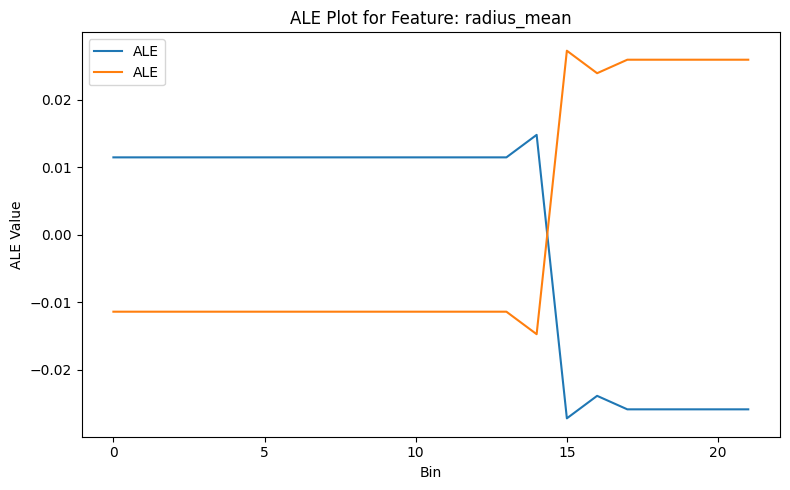

In [47]:
feature_idx = 0

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ale_exp.ale_values[feature_idx], label='ALE')
ax.set_title(f'ALE Plot for Feature: {X.columns[feature_idx]}')
ax.set_xlabel('Bin')
ax.set_ylabel('ALE Value')
plt.legend()
plt.tight_layout()
plt.show()

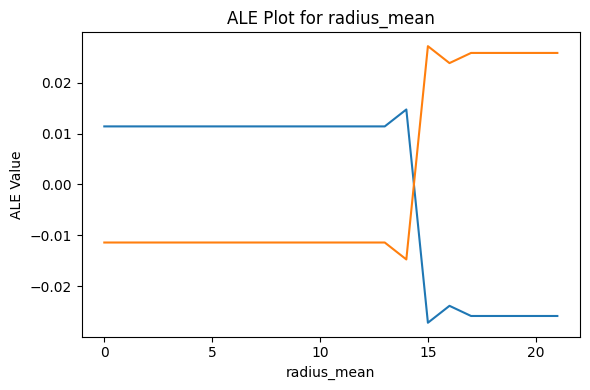

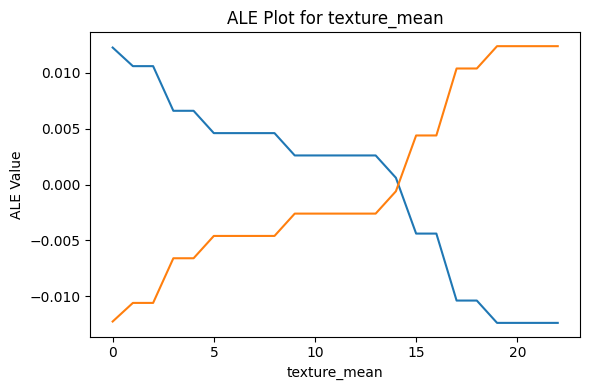

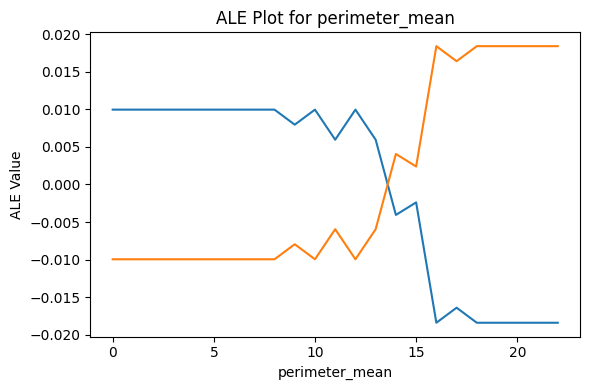

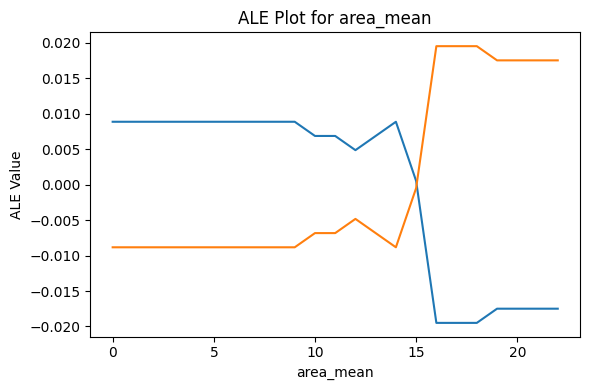

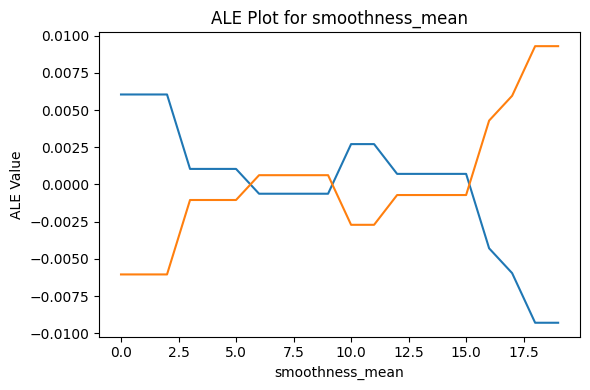

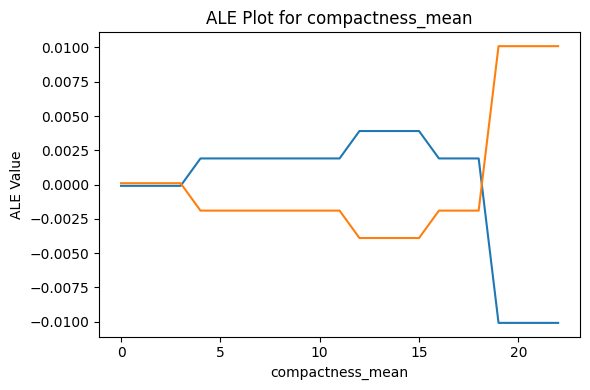

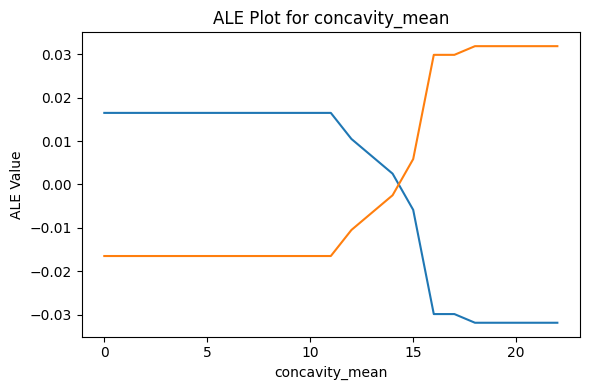

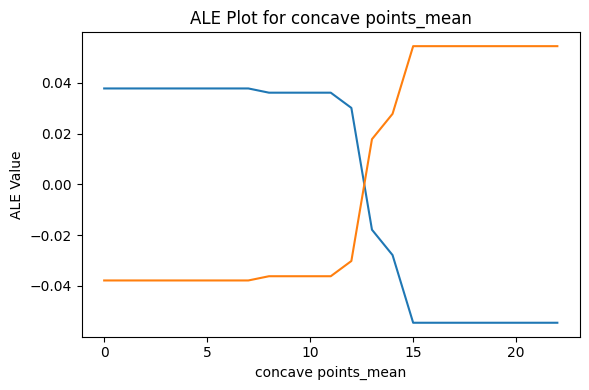

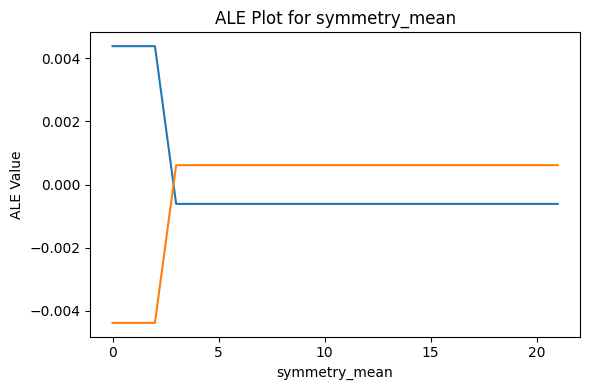

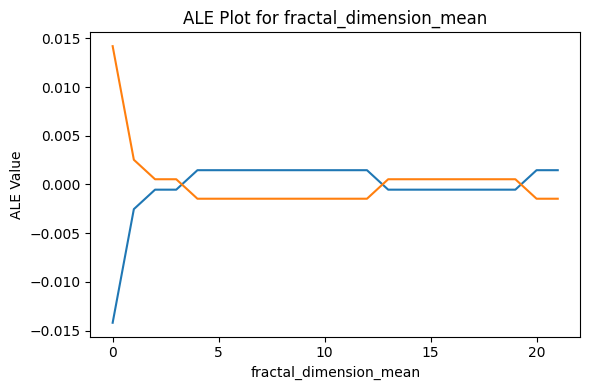

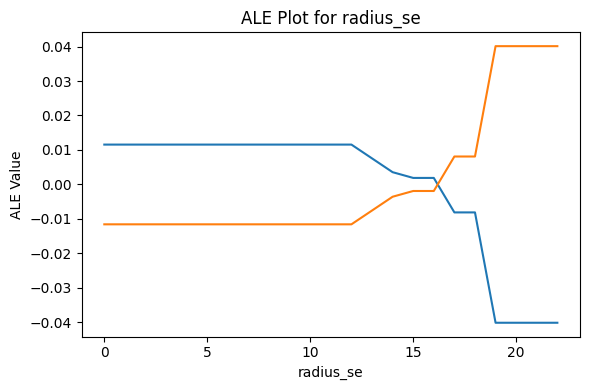

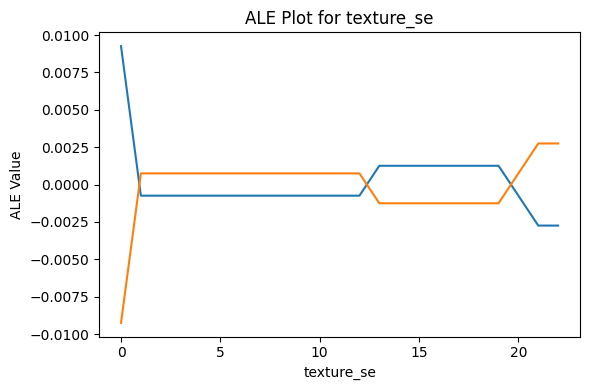

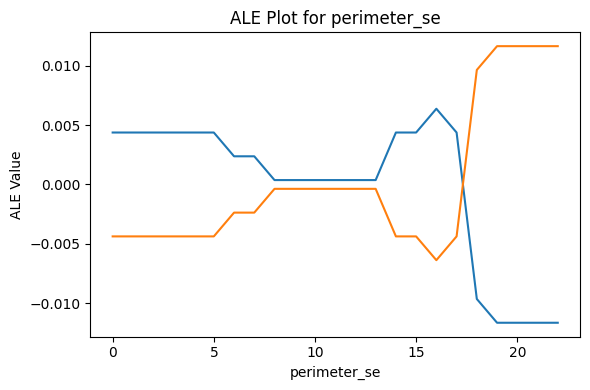

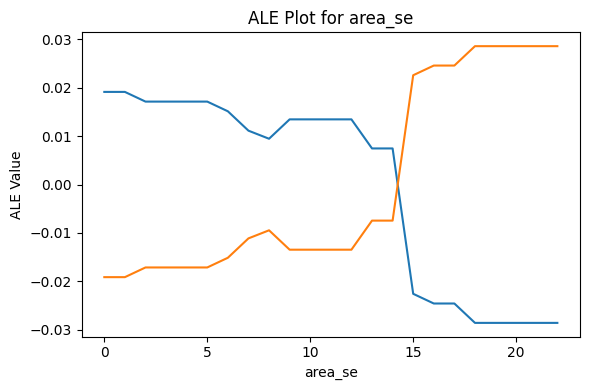

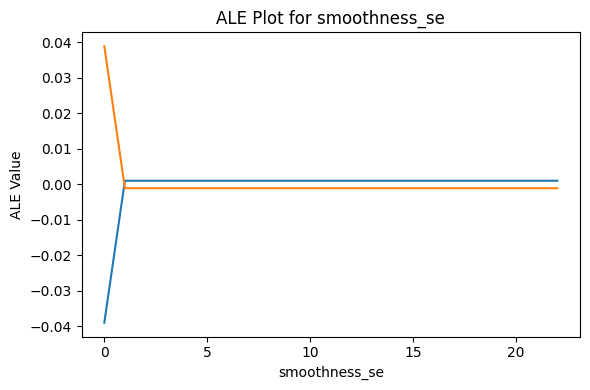

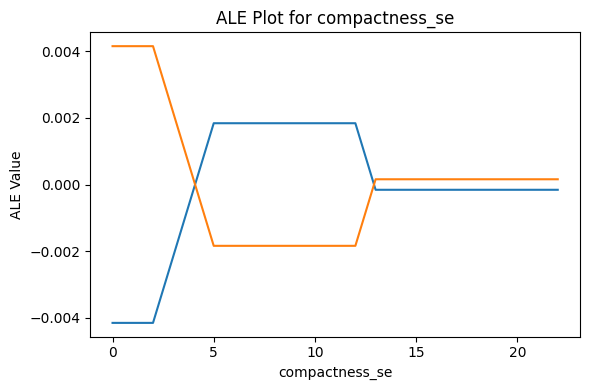

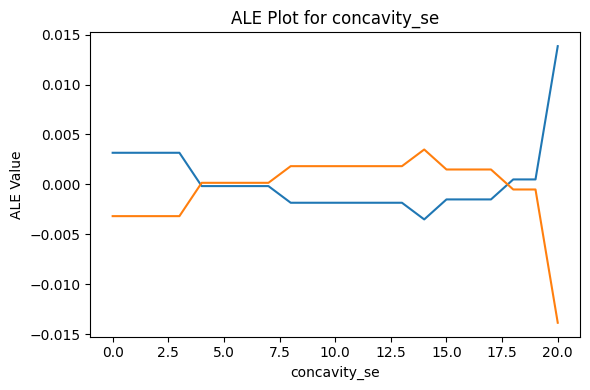

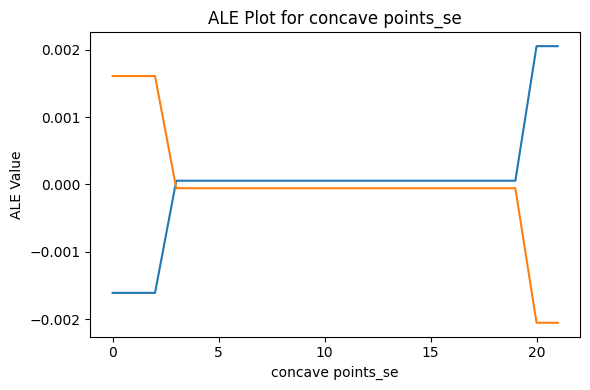

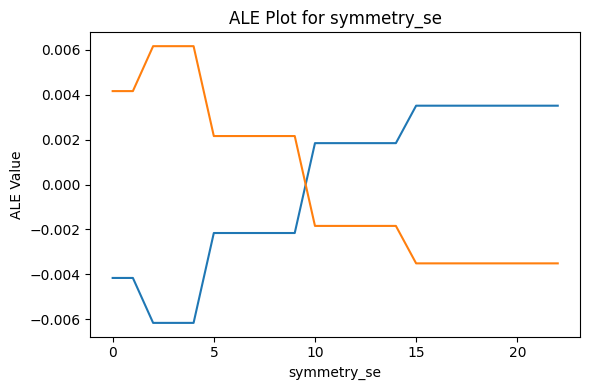

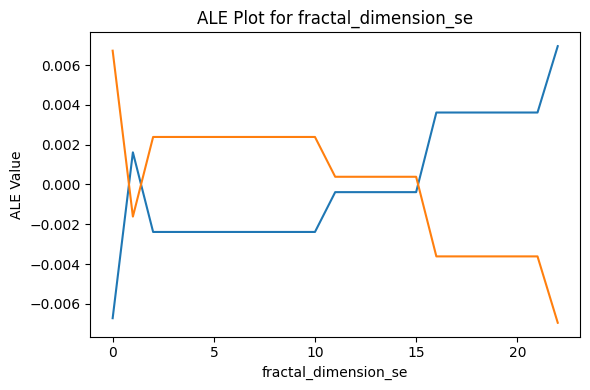

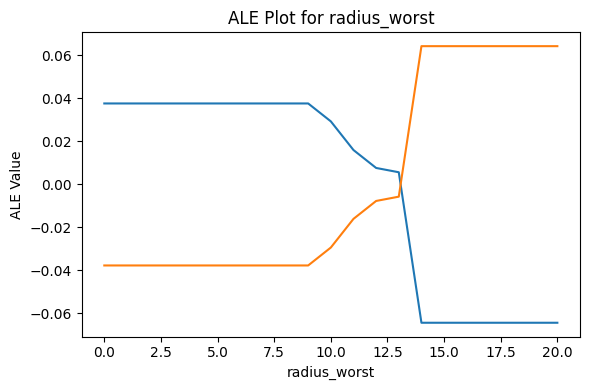

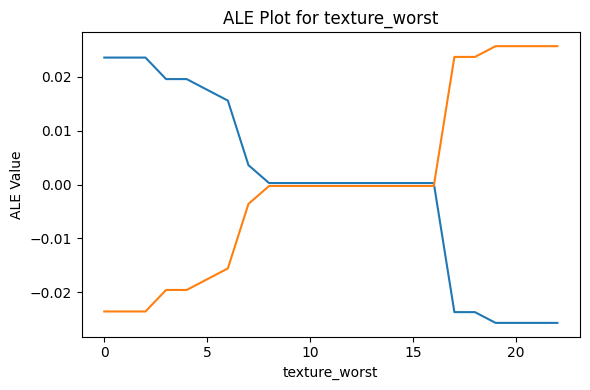

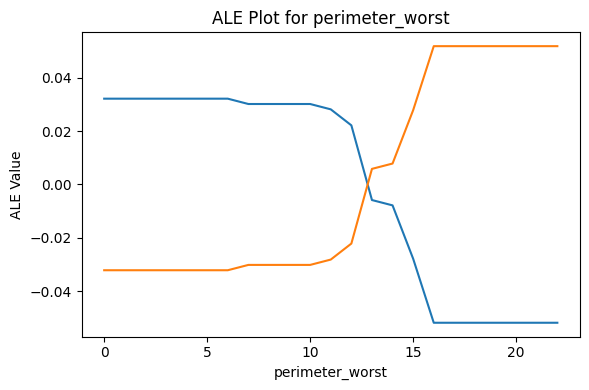

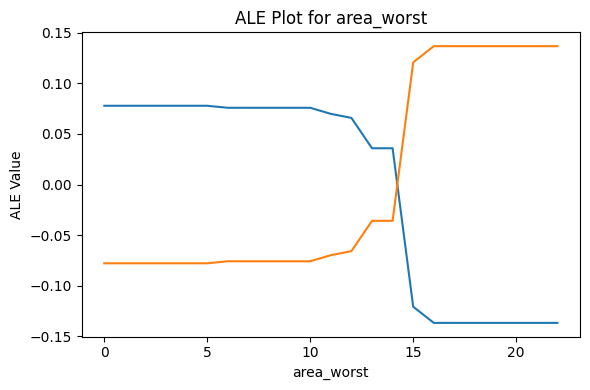

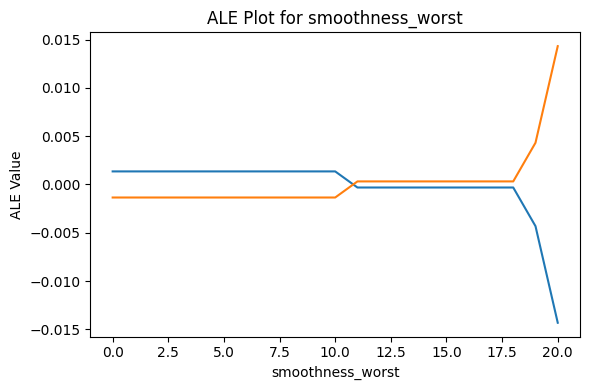

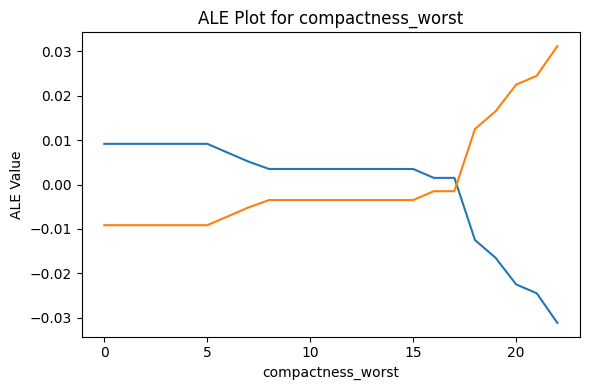

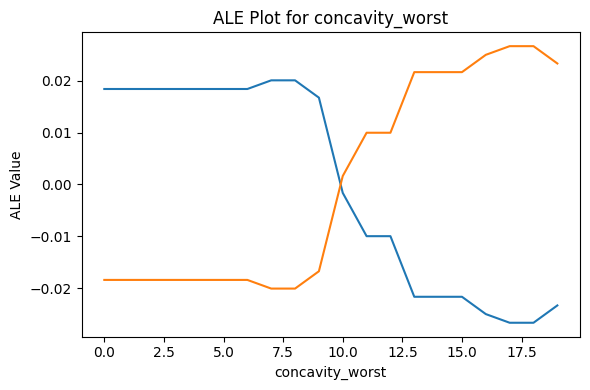

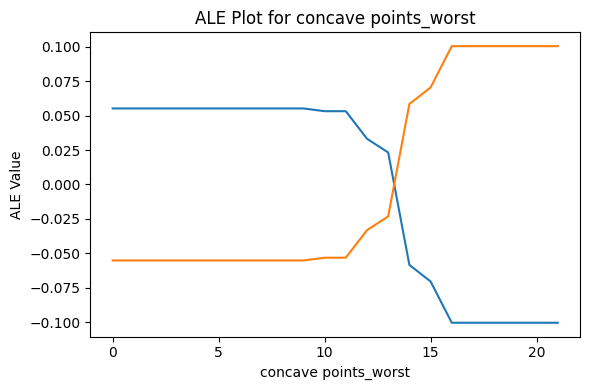

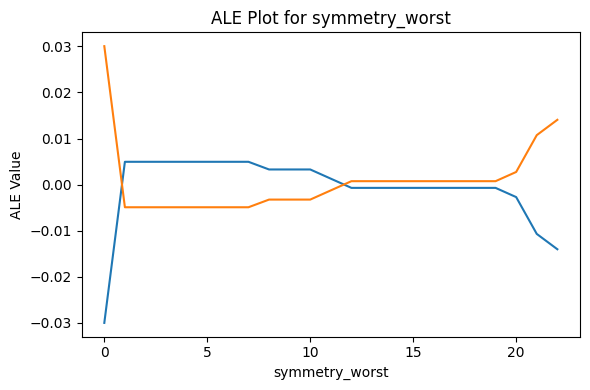

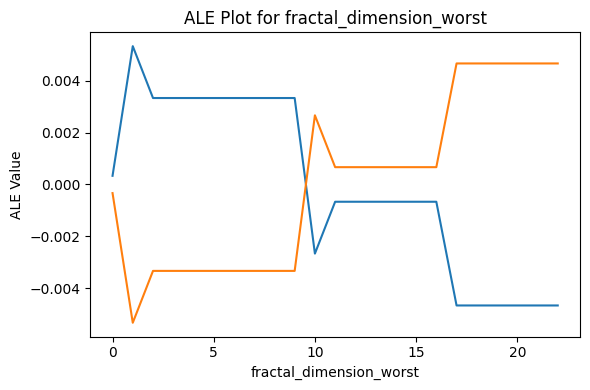

In [50]:
for idx, feature in enumerate(X.columns): # Use original DataFrame X for column names
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(ale_exp.ale_values[idx])
    ax.set_title(f"ALE Plot for {feature}")
    ax.set_xlabel(f"{feature}")
    ax.set_ylabel("ALE Value")
    plt.tight_layout()
    plt.show()

In [53]:
top_n = 10
importances = rf_model.feature_importances_
feature_names = X.columns.tolist()

indices = np.argsort(importances)[::-1][:top_n]
top_features = [feature_names[i] for i in indices]

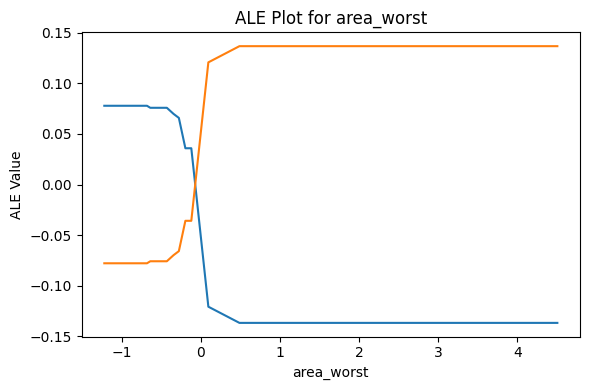

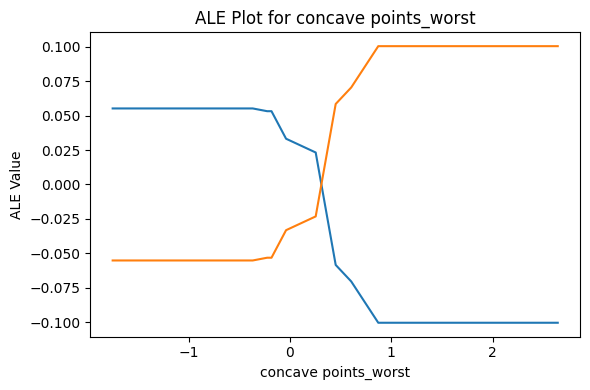

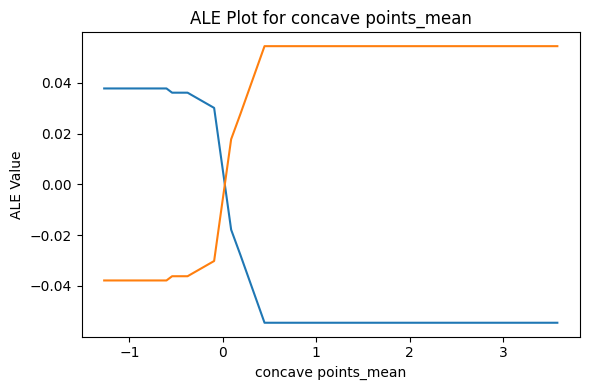

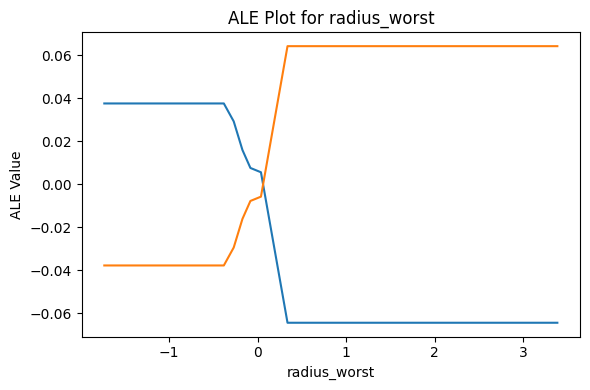

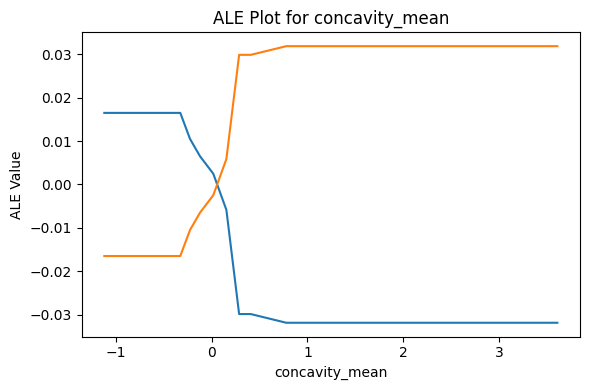

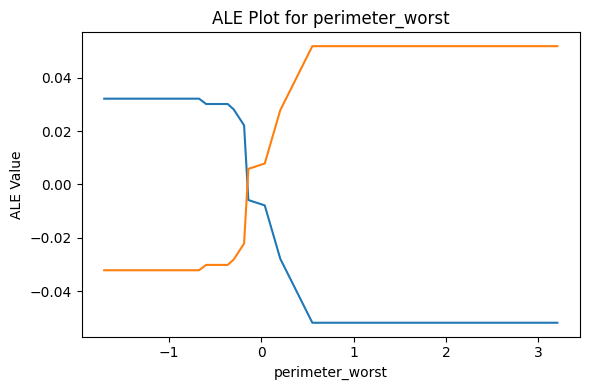

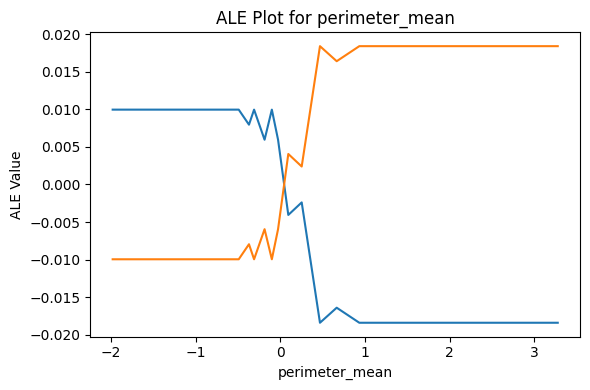

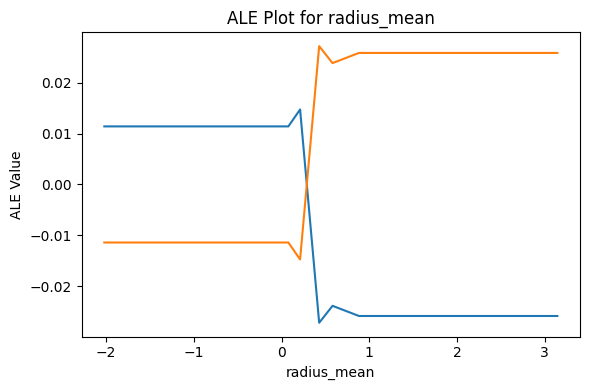

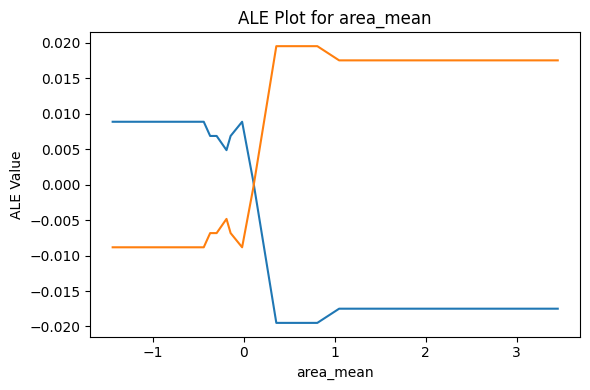

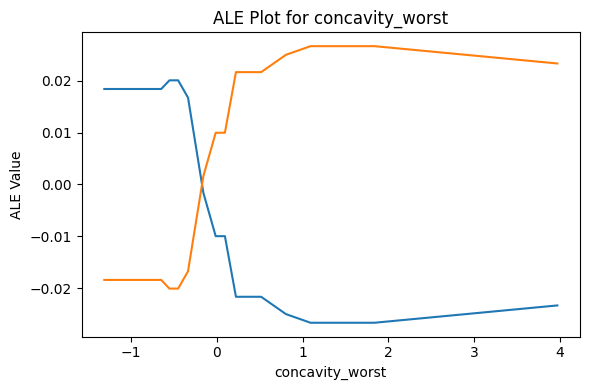

In [54]:
for feature in top_features:
    idx = feature_names.index(feature)
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(ale_exp.feature_values[idx], ale_exp.ale_values[idx])
    ax.set_title(f"ALE Plot for {feature}")
    ax.set_xlabel(f"{feature}")
    ax.set_ylabel("ALE Value")
    plt.tight_layout()
    plt.show()


**ELI5**

In [55]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 6.1 MB/s eta 0:00:00


In [57]:
import eli5
from eli5.sklearn import PermutationImportance

perm_rf = PermutationImportance(rf_model, random_state=42)
perm_rf.fit(X_train_scaled, y_train)

eli5.show_weights(perm_rf, feature_names=X.columns.tolist())


Weight,Feature
0.0031 ± 0.0022,texture_worst
0.0022 ± 0.0028,compactness_se
0.0022 ± 0.0000,symmetry_worst
0.0022 ± 0.0028,concave points_worst
0.0022 ± 0.0000,radius_se
0.0018 ± 0.0018,perimeter_se
0.0018 ± 0.0018,area_se
0.0018 ± 0.0018,texture_mean
0.0013 ± 0.0022,concave points_mean
0.0013 ± 0.0022,texture_se


In [58]:
perm_log = PermutationImportance(lr_model, random_state=42)
perm_log.fit(X_train_scaled, y_train)

eli5.show_weights(perm_log, feature_names=X.columns.tolist())


Weight,Feature
0.0268 ± 0.0116,symmetry_worst
0.0268 ± 0.0085,texture_worst
0.0224 ± 0.0109,concave points_mean
0.0180 ± 0.0146,radius_se
0.0149 ± 0.0085,concavity_worst
0.0132 ± 0.0048,concavity_mean
0.0084 ± 0.0085,area_worst
0.0075 ± 0.0082,radius_worst
0.0066 ± 0.0092,concave points_worst
0.0053 ± 0.0045,perimeter_se
